## Prepare dataset



First of all, let's import the libraries to prepare the datasets

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas
import skimage
import sklearn
import os

### Simpsons
* Download the Simpsons Characters dataset. Here you can find more information about the dataset: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
* After extracting it, select only those images, on which Homer Simpson is present.
* Resize all image to be 64x64.
* Then split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
* Print the size of each set and plot 5 training images.
* Normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*



In [ ]:
# Simpsons characters

# Download from Drive
!if ! [ -f simpsons_dataset.zip ]; then curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" > /dev/null; curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" -o simpsons_dataset.zip; fi

# Check if the file size is correct (~1.07GB)
!if (( $(stat -c%s simpsons_dataset.zip) < 1158208931 )); then rm -rfd simpsons_dataset.zip; fi

# If not, download it from NIPG12
!wget -nc -O simpsons_dataset.zip http://nipg12.inf.elte.hu:8000/simpsons_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1478      0 --:--:-- --:--:-- --:--:--  1472
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1104M    0 1104M    0     0  41.2M      0 --:--:--  0:00:26 --:--:-- 48.2M
File ‘simpsons_dataset.zip’ already there; not retrieving.


In [ ]:
!unzip simpsons_dataset.zip

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
from os import listdir

#/content/simpsons_dataset/homer_simpson is the homer simpson folder 
images = list()
for filename in listdir('/content/simpsons_dataset/homer_simpson/'):
	# load image
	data = imread('/content/simpsons_dataset/homer_simpson/' + filename)
  #resizing
	resized_data = resize(data, (64,64))
	# store resized image
	images.append(resized_data)
	#print('> loaded %s %s' % (filename, resized_data.shape)) 

In [ ]:
images = np.array(images)

Now we can split the dataset into train-test-val subsets

In [ ]:
train_set = images[:round(len(images)*0.6)]
test_set = images[round(len(images)*0.6):round(len(images)*0.8)]
val_set = images[round(len(images)*0.8):len(images)]

In [ ]:
l_train = len(train_set)
l_test = len(test_set)
l_val = len(val_set)

print(l_train, l_test, l_val) #length check

1348 449 449


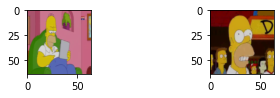

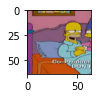

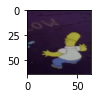

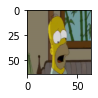

In [ ]:
plt.figure(1)
plt.subplot(321)
plt.imshow(train_set[0])

plt.subplot(322)
plt.imshow(train_set[1])
plt.show()

plt.subplot(323)
plt.imshow(train_set[2])
plt.show()

plt.subplot(324)
plt.imshow(train_set[3])
plt.show()

plt.subplot(325)
plt.imshow(train_set[4])
plt.show()

### Flowers
* Download the Flowes Recognition dataset. Here you can find more information about the dataset: https://www.kaggle.com/alxmamaev/flowers-recognition
* After extracting it, resize all image to be 64x64.
* Print the size of each set and plot 5 training images.
* And finally normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

In [ ]:
# Flowers Recgonition

# Download from Drive
!if ! [ -f flowers-recognition.zip ]; then curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" > /dev/null; curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" -o flowers-recognition.zip; fi

# Check if the file size is correct (~224MB)
!if (( $(stat -c%s flowers-recognition.zip) < 235781000 )); then rm -rfd flowers-recognition.zip; fi

# If not, download it from NIPG12
!wget -nc -O flowers-recognition.zip http://nipg12.inf.elte.hu:8000/flowers-recognition.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    480      0 --:--:-- --:--:-- --:--:--   480
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  224M    0  224M    0     0  25.8M      0 --:--:--  0:00:08 --:--:-- 47.5M
File ‘flowers-recognition.zip’ already there; not retrieving.


In [ ]:
!unzip flowers-recognition.zip

In [ ]:
#I used here a different method of image extraction
def load_images_from_folder(folder1, folder2, folder3, folder4, folder5):
    images = []
    folders = [folder1, folder2, folder3, folder4, folder5]
    for folder in folders:
      for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            resized_img = resize(img, (64,64))
            images.append(resized_img)
            #print('> loaded %s %s' % (filename, resized_data.shape))
    return images

daisy_folder="/content/flowers/daisy"
dandelion_folder="/content/flowers/dandelion"
rose_folder="/content/flowers/rose"
sunflower_folder="/content/flowers/sunflower"
tulip_folder="/content/flowers/tulip"

flower = load_images_from_folder(daisy_folder, dandelion_folder, rose_folder, sunflower_folder, tulip_folder)

In [ ]:
flower = np.array(flower)

Considering that there is no information about the spliting of this dataset, I did the same as simpson dataset but I shuffled it before because I just concatenated the folders so all flowers are sorted. 

In [ ]:
import random 

random.seed = 24
random.shuffle(flower)

In [ ]:
train_set_f = flower[:round(len(flower)*0.6)]
test_set_f = flower[round(len(flower)*0.6):round(len(flower)*0.8)]
val_set_f = flower[round(len(flower)*0.8):len(flower)]

In [ ]:
l_train_f = len(train_set_f)
l_test_f = len(test_set_f)
l_val_f = len(val_set_f)

print(l_train_f, l_test_f, l_val_f)

2594 864 865


In [ ]:
len(flower) #2424+808+808, perfect, let's continue

4323

In [ ]:
print('Min: %.3f, Max: %.3f' % (flower[2].min(), flower[2].max())) #we can see here that the images are already normalized

Min: 0.000, Max: 0.956


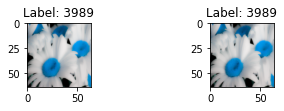

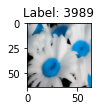

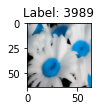

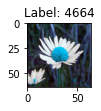

In [ ]:
plt.figure(1)
plt.subplot(321)
plt.imshow(train_set_f[0])
plt.title("Label: %d" % np.argmax(train_set_f[0]))

plt.subplot(322)
plt.imshow(train_set_f[1])
plt.title("Label: %d" % np.argmax(train_set_f[0]))
plt.show()

plt.subplot(323)
plt.imshow(train_set_f[2])
plt.title("Label: %d" % np.argmax(train_set_f[0]))
plt.show()

plt.subplot(324)
plt.imshow(train_set_f[3])
plt.title("Label: %d" % np.argmax(train_set_f[0]))
plt.show()

plt.subplot(325)
plt.imshow(train_set_f[501])
plt.title("Label: %d" % np.argmax(train_set_f[501]))
plt.show()

## Data augmentation
  * Augment the training set using `ImageDataGenerator`. The parameters should be the following: `featurewise_center=False, featurewise_std_normalization=False, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True`.
  * When creating the generator(s), use shuffling with a seed value of 0 and batch size of 128.
  * To validate that the augmentation is working, plot 5 original images with their corresponding transformed (augmented) images.

**Keep in mind:** Your task is to reconstuct images, so your target is your input. To augment the inputs and targets the same way, you should create 2 separate generator, then you can zip them together.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IDG_simpson_gen = ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=False, rotation_range=15, 
                                     width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True)

IDG_simpson_gen2 = ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=False, rotation_range=15, 
                                     width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True)
#First of all, we have to create the generators

In [ ]:
gen_simpson1 = IDG_simpson_gen.flow(train_set, batch_size=128, shuffle=True, seed = 0)
gen_simpson2 = IDG_simpson_gen.flow(train_set, batch_size=128, shuffle=True, seed = 0)

#We can also use .flow_from_directory if there are too many images

# gen_simpson = IDG_simpson_gen.flow(trains_set, train_set, batch_size=128, shuffle=True, seed = 0)
gen_simpson = zip(gen_simpson1, gen_simpson2)

In [ ]:
IDG_val = ImageDataGenerator()
gen_val = IDG_val.flow(val_set, batch_size= 128, shuffle=True, seed=0)

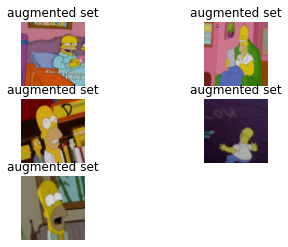

In [ ]:
test_img = next(IDG_simpson_gen.flow(train_set[:5], batch_size=128, shuffle=True, seed = 0))
#next function allow us to find the augmented image (iterator function)

plt.figure()
for i in range(5):
  plt.subplot(3, 2, i+1)
  plt.imshow(test_img[i])
  plt.title("augmented set")
  plt.axis('off')

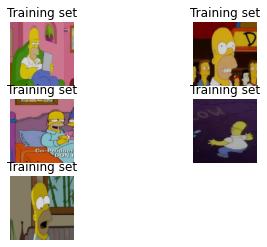

In [ ]:
plt.figure()
for i in range(5):
  plt.subplot(3, 2, i+1)
  plt.imshow(train_set[i])
  plt.title("Training set")
  plt.axis('off')

All the images are augmented correctly, let's continue

## Define the model
Define the following architecture in tf.keras:
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0         
_________________________________________________________________
dense (Dense)                (None, 256, 1024)         66560     
_________________________________________________________________
dense_1 (Dense)              (None, 256, 256)          262400    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 64)        147520    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 3)         867       
=================================================================
Total params: 653,731
Trainable params: 653,731
Non-trainable params: 0
_________________________________________________________________
```
* Use relu, a kernel size of 3x3 and `padding='same'` for each layer.
* Use a 3x3 `Conv2DTranspose` layer to upsample the result. 
* For optimizer use Adam, and MAE as loss function, and add MSE as a metric.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import callbacks

Nothing special to say here, I just added the layers according to the network given. 

In [ ]:
def ae_model(input_size=(64, 64, 3)):
  m = models.Sequential()
  m.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_size))
  m.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  m.add(layers.MaxPooling2D((2, 2), padding='same'))
  m.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  m.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  m.add(layers.MaxPooling2D((2, 2), padding='same'))
  m.add(layers.Reshape((256,64)))
  m.add(layers.Dense(1024, activation='softmax'))
  m.add(layers.Dense(256, activation='softmax'))
  m.add(layers.Reshape((16,16,256))) 
  m.add(layers.Convolution2DTranspose(64,(3,3), activation='relu',padding='same', strides=(2, 2)))
  m.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  m.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  m.add(layers.Convolution2DTranspose(32,(3,3), activation='relu', padding='same', strides=(2, 2)))
  m.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  m.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  m.add(layers.Conv2D(3, (3, 3), activation='relu', padding='same'))

  m.compile(optimizer='adam', loss='mae', metrics=['mse'])
  return m

model_def = ae_model(input_size=(64, 64, 3))
model_def.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 256, 64)          

## Training and evaluation 
  * Train the model on the augmented data for 200 epochs without early stopping.
  * Plot the training curve (train/validation loss and mse).
  * Evaluate the trained model on the test set.
  * Plot some (5) reconstruction examples. (Input and prediction pairs.)
  * Calculate the mean and the std of the MAE loss on the **validation dataset** (*not on the loss history*), then set the classification threshold to the following: `<thrs> = <mean> + 0.5*<std>`. *Note: To get the mean and std, you have iterate over all validation samples and calculate the reconstruction loss on each.*
  * Evaluate the classification performance on the test set.
  * And finally evaluate the classification performance on the Flowers dataset. 

In [ ]:
batch_size = 128
history = model_def.fit(gen_simpson, None, batch_size, steps_per_epoch=20, epochs=200, verbose=1, validation_data = (val_set, val_set))

Epoch 1/200
20/20 [==============================] - 7s 374ms/step - loss: 0.2990 - mse: 0.1366 - val_loss: 0.2175 - val_mse: 0.0696
Epoch 2/200
20/20 [==============================] - 7s 329ms/step - loss: 0.2058 - mse: 0.0613 - val_loss: 0.2056 - val_mse: 0.0608
Epoch 3/200
20/20 [==============================] - 7s 332ms/step - loss: 0.2013 - mse: 0.0580 - val_loss: 0.2019 - val_mse: 0.0580
Epoch 4/200
20/20 [==============================] - 7s 334ms/step - loss: 0.1992 - mse: 0.0567 - val_loss: 0.2014 - val_mse: 0.0577
Epoch 5/200
20/20 [==============================] - 7s 329ms/step - loss: 0.1992 - mse: 0.0566 - val_loss: 0.2025 - val_mse: 0.0586
Epoch 6/200
20/20 [==============================] - 7s 342ms/step - loss: 0.1992 - mse: 0.0566 - val_loss: 0.2006 - val_mse: 0.0572
Epoch 7/200
20/20 [==============================] - 7s 332ms/step - loss: 0.1987 - mse: 0.0562 - val_loss: 0.2009 - val_mse: 0.0575
Epoch 8/200
20/20 [==============================] - 7s 331ms/step - 

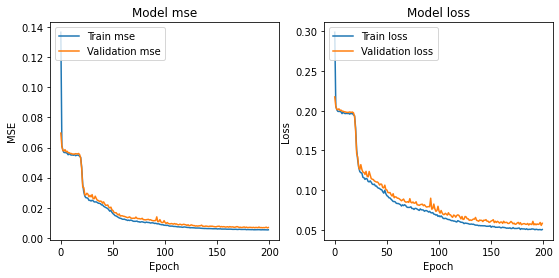

In [ ]:
# Plot training & validation mse values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train mse', 'Validation mse'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

In [ ]:
predicted = model_def.predict(test_set)

In [ ]:
loss, acc = model_def.evaluate(predicted, test_set, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

Test loss: 0.06776338815689087
Test accuracy: 0.86%


The results on the test sets are really bad.. But we'll see in the reconstruction images why

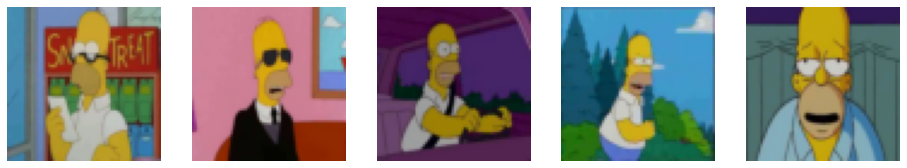

<Figure size 432x288 with 0 Axes>

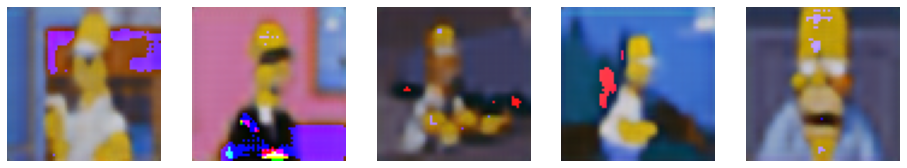

In [ ]:
test_in = test_set[:5]
test_out = model_def.predict(test_in)

plt.figure(figsize=(16,12))
for i in range(5):
  plt.subplot(3, 5, i+1)
  plt.imshow(test_in[i])
  plt.axis('off')
plt.show(); plt.clf()

plt.figure(figsize=(16,12))
for j in range(5):
  plt.subplot(3, 5, j+1)
  plt.imshow(((test_out[j]+1)*255).astype(np.uint8))
  plt.axis('off')

We indeed have the correct images below the originals one. But they are blurried... So maybe that's why the accuracy on the test set are so bad. 

In [ ]:
predicted_val = model_def.predict(val_set)

In [ ]:
mae = []

for i in range(len(val_set)):
  m = np.mean(np.abs(predicted_val[i] - val_set[i]))
  mae.append(m)

In [ ]:
threshold = np.mean(mae) +0.5*np.std(mae)

In [ ]:
threshold

0.06452935179944469

In [ ]:
res = []

for i in range(len(test_set)):
  r = tf.keras.losses.MAE(test_set[i],predicted[i]) < threshold
  print('image %d' % i)
  res.append(r)

classification = np.mean(res)

print(classification)

0.6807483426712138


So we have for the simpson dataset 68% of classification accuracy. 

In [ ]:
res_flower = []
predicted_flower = model_def.predict(flower)

for j in range(len(flower)):
  r = tf.keras.losses.MAE(flower[j],predicted_flower[j]) < threshold
  res_flower.append(r)

classification_flower = np.mean(res_flower)

print(classification_flower)

0.5453519307157935


And we have 54% for the flower dataset